# Flight Price Prediction
Problem Statement:
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

 

You have to use your skills as a data scientist and build a machine learning model to predict the price of the flight ticket. 

 

Note: You can find the dataset in the link below. 



Downlaod Files:
https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects

# Import necessary Python Modules

In [560]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression,Lasso, Ridge, LassoCV, RidgeCV 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score,recall_score,precision_score,f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

import pickle
import warnings
warnings.filterwarnings('ignore')

# TRAIN DATA

In [561]:
df = pd.read_excel(r'Data_Train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [563]:
#Data Summary
print(df.shape)

(10683, 11)


In [564]:
df.isnull().sum().sort_values(ascending=False)

Route              1
Total_Stops        1
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Additional_Info    0
Price              0
dtype: int64

In [565]:
#find duplicates
df.duplicated().sum()

220

In [566]:
df = df.drop_duplicates()

In [567]:
#find duplicates
df.duplicated().sum()

0

In [568]:
#checing datatypes of each column
df.dtypes.sort_values(ascending=False)

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [569]:
for i in df.columns:
    print("*******************************************************")
    print("Value counts of", i, "\n" )
    print(df[i].value_counts())
    print('*******************************************************')

*******************************************************
Value counts of Airline 

Jet Airways                          3700
IndiGo                               2043
Air India                            1695
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
*******************************************************
*******************************************************
Value counts of Date_of_Journey 

6/06/2019     490
18/05/2019    486
9/06/2019     485
12/06/2019    483
21/05/2019    482
9/05/2019     466
21/03/2019    412
15/05/2019    402
27/05/2019    369
27/06/2019    339
1/06/2019     330
24/06/2019    330
3/06/2019     326
24/03/

<AxesSubplot:ylabel='Additional_Info'>

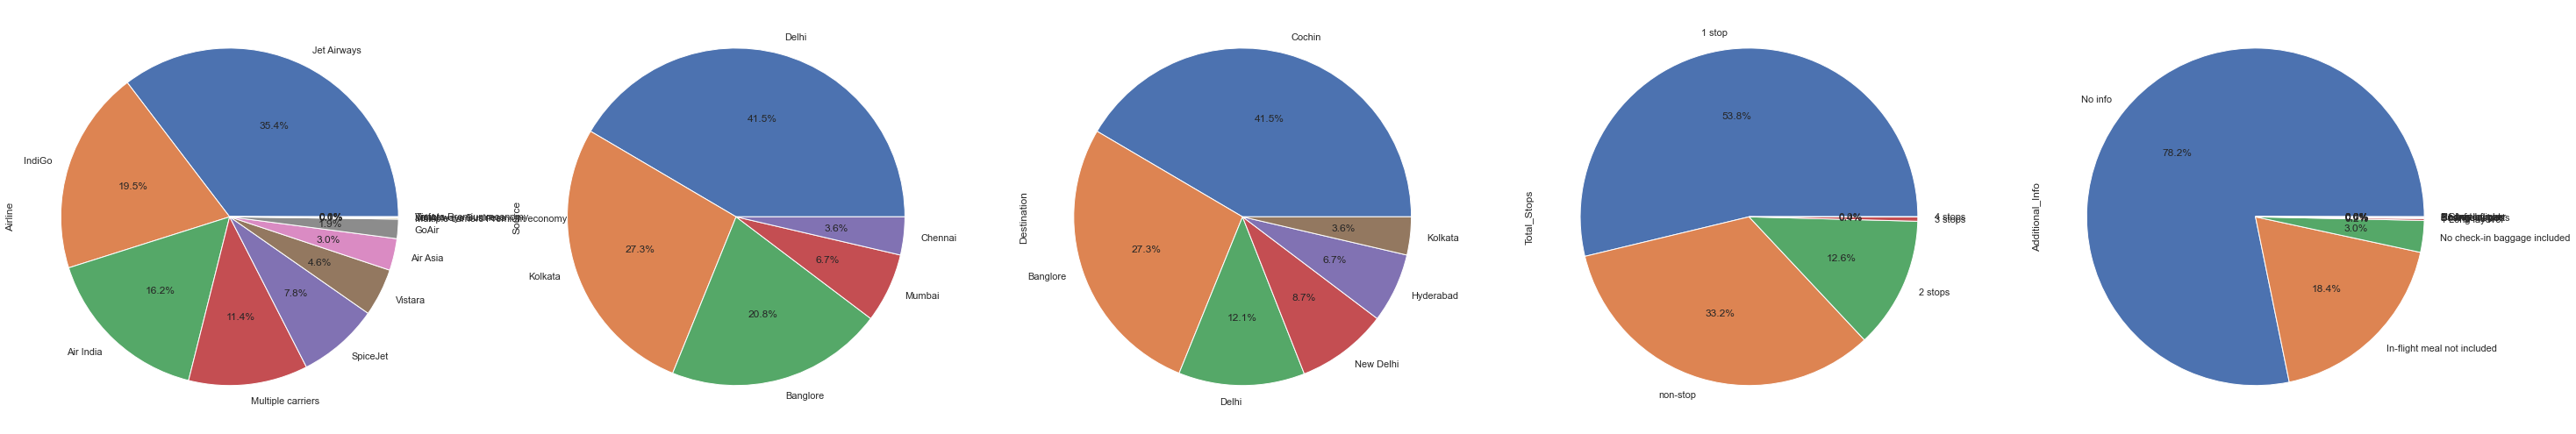

In [570]:
plt.figure(figsize=(50,25))
plt.subplot(1,5,1)
df['Airline'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,5,2)
df['Source'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,5,3)
df['Destination'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,5,4)
df['Total_Stops'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,5,5)
df['Additional_Info'].value_counts().plot.pie(autopct='%1.1f%%')

# DROPPING COLUMNS

In [571]:
#we will dropping the null entries and drop a few unimportant columns

# TREATING NULL VALUES

In [572]:
#we will drop the NaN entries

In [573]:
df.dropna(inplace= True)
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [574]:
#Route variable represents the path of the journey. 
#So we shall drop this variables.

In [575]:
df = df.drop(columns=['Route'])

# Handling Date and Time Variables

In [576]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302


In [577]:
#Date_of_Journey is in the dd/mm/yyyy format, we will divide it inot day and month 
#Dep_Time & Arrival_Time is in the format hh:mm, we will divide it into hour and minute

In [578]:
#We have ‘Date_of_Journey’, a ‘date type variable and ‘Dep_Time’, ‘Arrival_Time’ that captures time information

In [579]:
#We can extract ‘Journey_day’ and ‘Journey_Month’ from the ‘Date_of_Journey’ variable. 
#‘Journey day’ shows the day of the month on which the journey was started.

In [580]:
df["Journey_day"] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.day
df["Journey_month"] = pd.to_datetime(df["Date_of_Journey"], format = "%d/%m/%Y").dt.month
df.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [581]:
#Similarly, we can extract ‘Departure_Hour’ and ‘Departure_Minute’ as well as ‘Arrival_Hour and ‘Arrival_Minute’ 
#from ‘Dep_Time’ and ‘Arrival_Time’ variables respectively.

In [582]:
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute
df.drop(["Dep_Time"], axis = 1, inplace = True)

In [583]:
df["Arrival_hour"] = pd.to_datetime(df.Arrival_Time).dt.hour
df["Arrival_min"] = pd.to_datetime(df.Arrival_Time).dt.minute
df.drop(["Arrival_Time"], axis = 1, inplace = True)

In [584]:
#We also have duration information on the ‘Duration’ variable. 
#This variable contains both duration hours and minutes information combined.

In [585]:
#We can extract ‘Duration_hours’ and ‘Duration_minutes’ separately from the ‘Duration’ variable.

In [586]:
def get_duration(x):
    x=x.split(' ')
    hours=0
    mins=0
    if len(x)==1:
        x=x[0]
        if x[-1]=='h':
            hours=int(x[:-1])
        else:
            mins=int(x[:-1])
    else:
        hours=int(x[0][:-1])
        mins=int(x[1][:-1])
    return hours,mins
df['Duration_hours']=df.Duration.apply(lambda x:get_duration(x)[0])
df['Duration_mins']=df.Duration.apply(lambda x:get_duration(x)[1])
df.drop(["Duration"], axis = 1, inplace = True)

# Handling Categorical Data

In [587]:
#Airline, Source, Destination, Route, Total_Stops, Additional_info are the categorical variables we have in our data. 
#Let’s handle each one by one.

# Airline Variable

In [588]:
#Let’s see how the Airline variable is related to the Price variable.

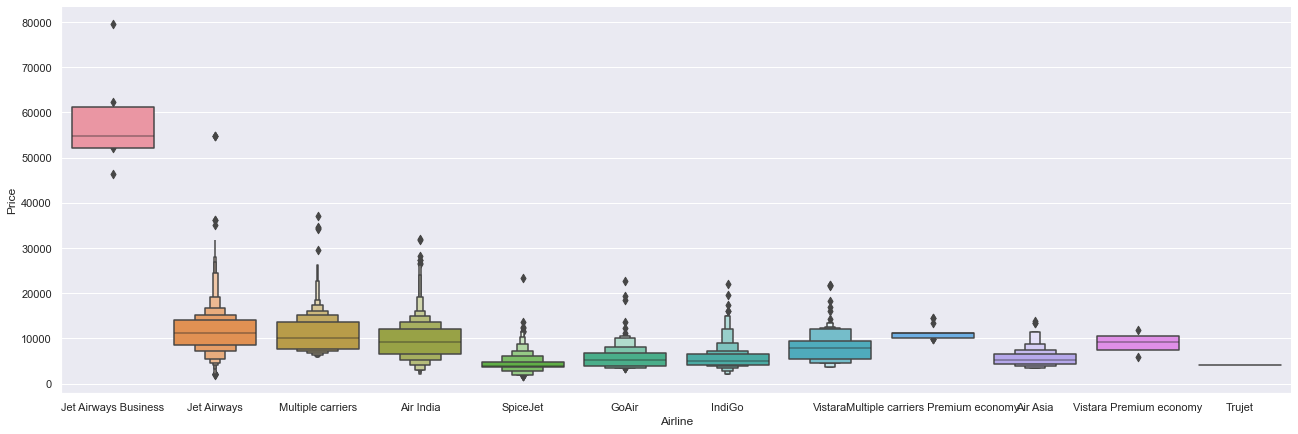

In [589]:
import seaborn as sns
sns.set()
sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [590]:
#As we can see the name of the airline matters. 
#‘JetAirways Business’ has the highest price range. Other airlines price also varies.

In [591]:
# Since the Airline variable is Nominal Categorical Data (There is no order of any kind in airline names) we will use label encoding to handle this variable.

# Total_Stops

In [592]:
#Since the ‘Total_Stops’ variable captures the information if the flight is direct or connected 

In [593]:
df["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [594]:
#Here, non-stop means 0 stops which means direct flight. Similarly meaning other values is obvious
#we shall encode the values manually

In [595]:
df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Additional_Info variable

In [596]:
df.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [597]:
#As we can see, this feature captures relevant that can affect flight price significantly. 
#Also ‘ No Info’ values are repeated. Let’s handle that first.

In [598]:
df['Additional_Info'].replace({"No info": 'No Info'}, inplace = True)

In [599]:
#Now this variable is also Nominal Categorical Data. Let’s use Label Encoding to handle this variable.

# ENCODING

In [600]:
df.dtypes

Airline            object
Source             object
Destination        object
Total_Stops         int64
Additional_Info    object
Price               int64
Journey_day         int64
Journey_month       int64
Dep_hour            int64
Dep_min             int64
Arrival_hour        int64
Arrival_min         int64
Duration_hours      int64
Duration_mins       int64
dtype: object

In [601]:
#Import library:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Airline', 'Source', 'Destination', 'Additional_Info']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])

In [602]:
df.shape

(10462, 14)

In [603]:
for i in df.columns:
    print("*******************************************************")
    print("Value counts of", i, "\n" )
    print(df[i].value_counts())
    print('*******************************************************')

*******************************************************
Value counts of Airline 

4     3700
3     2043
1     1694
6     1196
8      815
10     478
0      319
2      194
7       13
5        6
11       3
9        1
Name: Airline, dtype: int64
*******************************************************
*******************************************************
Value counts of Source 

2    4345
3    2860
0    2179
4     697
1     381
Name: Source, dtype: int64
*******************************************************
*******************************************************
Value counts of Destination 

1    4345
0    2860
2    1265
5     914
3     697
4     381
Name: Destination, dtype: int64
*******************************************************
*******************************************************
Value counts of Total_Stops 

1    5625
0    3475
2    1318
3      43
4       1
Name: Total_Stops, dtype: int64
*******************************************************
******************************

# TEST DATA

In [604]:
df_test = pd.read_excel(r'Test_set.xlsx')
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [605]:
y_test = pd.read_excel(r'Sample_submission.xlsx')
y_test.head()

,Price
0,15998
1,16612
2,25572
3,25778
4,16934


In [606]:
y_test = y_test['Price']

In [607]:
print(df_test.shape)
print(y_test.shape)

(2671, 10)
(2671,)


In [608]:
df_test.isnull().sum().sort_values(ascending=False)

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [609]:
#find duplicates
df_test.duplicated().sum()

26

In [610]:
#checing datatypes of each column
df_test.dtypes.sort_values(ascending=False)

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

In [611]:
for i in df_test.columns:
    print("*******************************************************")
    print("Value counts of", i, "\n" )
    print(df_test[i].value_counts())
    print('*******************************************************')

*******************************************************
Value counts of Airline 

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64
*******************************************************
*******************************************************
Value counts of Date_of_Journey 

9/05/2019     144
12/06/2019    135
18/05/2019    129
6/06/2019     127
9/06/2019     119
21/05/2019    118
15/05/2019    106
15/06/2019    105
6/03/2019      97
21/03/2019     93
3/06/2019      92
1/06/2019      88
24/06/2019     85
1/04/2019      78
24/03/2019     78
27/06/2019     75
6/05/

<AxesSubplot:ylabel='Additional_Info'>

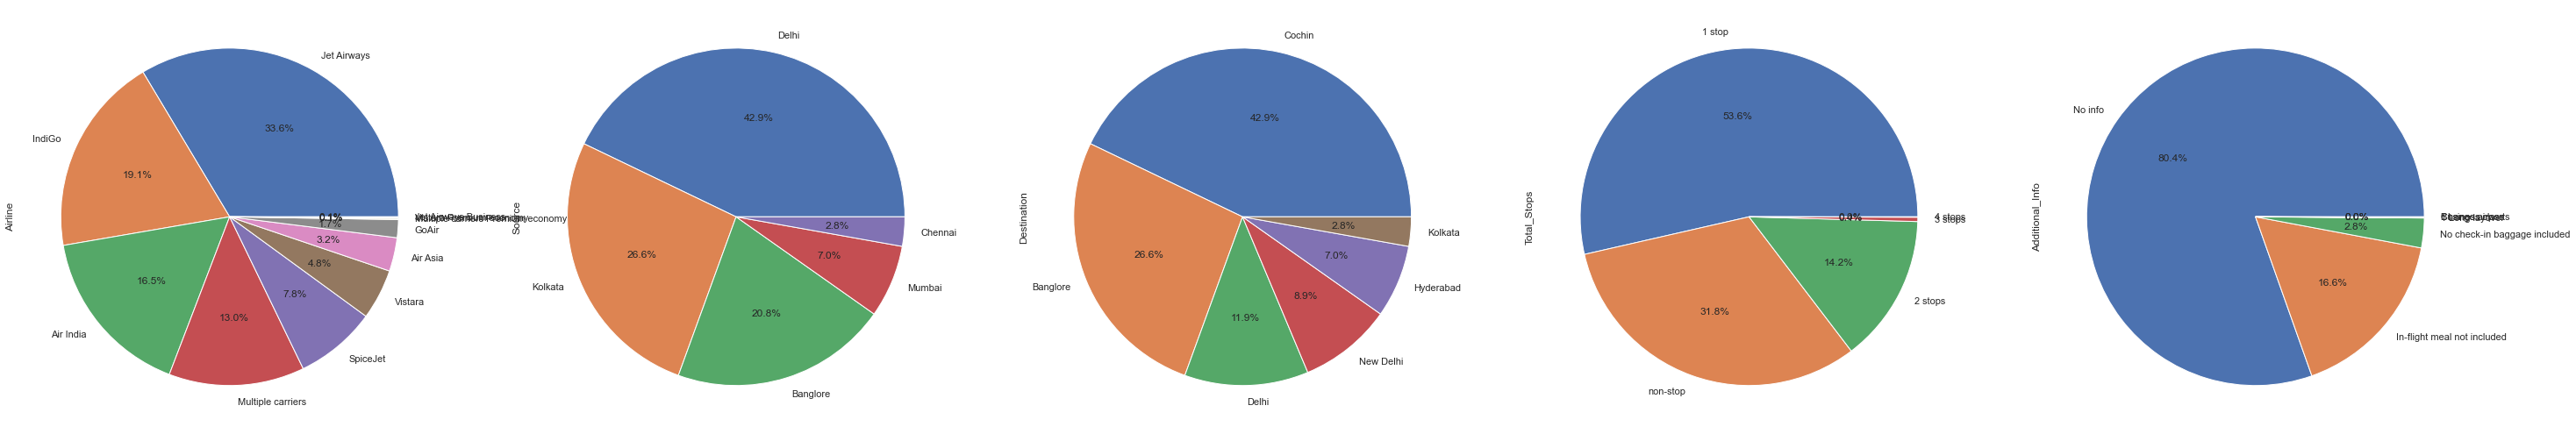

In [612]:
plt.figure(figsize=(50,25))
plt.subplot(1,5,1)
df_test['Airline'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,5,2)
df_test['Source'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,5,3)
df_test['Destination'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,5,4)
df_test['Total_Stops'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,5,5)
df_test['Additional_Info'].value_counts().plot.pie(autopct='%1.1f%%')


# DROPPING COLUMNS

In [613]:
#Route variable represents the path of the journey. 
#So we shall drop this variables.

In [614]:
df_test = df_test.drop(columns=['Route'])

# Handling Date and Time Variables

In [615]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [616]:
#Date_of_Journey is in the dd/mm/yyyy format, we will divide it inot day and month 
#Dep_Time & Arrival_Time is in the format hh:mm, we will divide it into hour and minute
#We have ‘Date_of_Journey’, a ‘date type variable and ‘Dep_Time’, ‘Arrival_Time’ that captures time information

#We can extract ‘Journey_day’ and ‘Journey_Month’ from the ‘Date_of_Journey’ variable. 
#‘Journey day’ shows the day of the month on which the journey was started.

In [617]:
df_test["Journey_day"] = pd.to_datetime(df_test.Date_of_Journey, format="%d/%m/%Y").dt.day
df_test["Journey_month"] = pd.to_datetime(df_test["Date_of_Journey"], format = "%d/%m/%Y").dt.month
df_test.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [618]:
#Similarly, we can extract ‘Departure_Hour’ and ‘Departure_Minute’ as well as ‘Arrival_Hour and ‘Arrival_Minute’ 
#from ‘Dep_Time’ and ‘Arrival_Time’ variables respectively.

In [619]:
df_test["Dep_hour"] = pd.to_datetime(df_test["Dep_Time"]).dt.hour
df_test["Dep_min"] = pd.to_datetime(df_test["Dep_Time"]).dt.minute
df_test.drop(["Dep_Time"], axis = 1, inplace = True)

In [620]:
df_test["Arrival_hour"] = pd.to_datetime(df_test.Arrival_Time).dt.hour
df_test["Arrival_min"] = pd.to_datetime(df_test.Arrival_Time).dt.minute
df_test.drop(["Arrival_Time"], axis = 1, inplace = True)

In [621]:
#We also have duration information on the ‘Duration’ variable. 
#This variable contains both duration hours and minutes information combined.

#We can extract ‘Duration_hours’ and ‘Duration_minutes’ separately from the ‘Duration’ variable.

In [622]:
df_test['Duration_hours']=df_test.Duration.apply(lambda x:get_duration(x)[0])
df_test['Duration_mins']=df_test.Duration.apply(lambda x:get_duration(x)[1])
df_test.drop(["Duration"], axis = 1, inplace = True)

# Handling Categorical Data

In [623]:
#Airline, Source, Destination, Route, Total_Stops, Additional_info are the categorical variables we have in our data. 
#Let’s handle each one by one.\

# Total_Stops

In [624]:
df_test["Total_Stops"].unique()

array(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'],
      dtype=object)

In [625]:
df_test.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# ENCODING

In [626]:
df_test.dtypes

Airline            object
Source             object
Destination        object
Total_Stops         int64
Additional_Info    object
Journey_day         int64
Journey_month       int64
Dep_hour            int64
Dep_min             int64
Arrival_hour        int64
Arrival_min         int64
Duration_hours      int64
Duration_mins       int64
dtype: object

In [627]:
#Import library:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Airline', 'Source', 'Destination', 'Additional_Info']
le = LabelEncoder()
for i in var_mod:
    df_test[i] = le.fit_transform(df_test[i])


In [628]:
df_test.shape

(2671, 13)

In [629]:
df_test

,Airline,Source,Destination,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,4,2,1,1,5,6,6,17,30,4,25,10,55
1,3,3,0,1,5,12,5,6,20,10,20,4,0
2,4,2,1,1,3,21,5,19,15,19,0,23,45
3,6,2,1,1,5,21,5,8,0,21,0,13,0
4,0,0,2,0,5,24,6,23,55,2,45,2,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,1,5,6,6,20,30,20,25,23,55
2667,3,3,0,0,5,27,3,14,20,16,55,2,35
2668,4,2,1,1,5,6,3,21,50,4,25,6,35
2669,1,2,1,1,5,6,3,4,0,19,15,15,15


In [630]:
df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,3,0,5,0,6,3897,24,3,22,20,1,10,2,50
1,1,3,0,2,6,7662,1,5,5,50,13,15,7,25
2,4,2,1,2,6,13882,9,6,9,25,4,25,19,0
3,3,3,0,1,6,6218,12,5,18,5,23,30,5,25
4,3,0,5,1,6,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,0,6,4107,9,4,19,55,22,25,2,30
10679,1,3,0,0,6,4145,27,4,20,45,23,20,2,35
10680,4,0,2,0,6,7229,27,4,8,20,11,20,3,0
10681,10,0,5,0,6,12648,1,3,11,30,14,10,2,40


In [631]:
df.describe()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
count,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000
mean,3.981074,1.953642,1.439495,0.802332,5.832250,9026.790289,13.463200,4.701491,12.478494,24.404989,13.387689,24.719939,10.026190,28.210189
std,2.364627,1.186327,1.481015,0.660609,0.512029,4624.849541,8.467493,1.163802,5.727227,18.815719,6.855547,16.570450,8.378023,16.879185
min,0.000000,0.000000,0.000000,0.000000,0.000000,1759.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,0.000000,0.000000,6.000000,5224.000000,6.000000,3.000000,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000
50%,4.000000,2.000000,1.000000,1.000000,6.000000,8266.000000,12.000000,5.000000,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000
75%,4.000000,3.000000,2.000000,1.000000,6.000000,12344.750000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000
max,11.000000,4.000000,5.000000,4.000000,8.000000,79512.000000,27.000000,6.000000,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000


<AxesSubplot:>

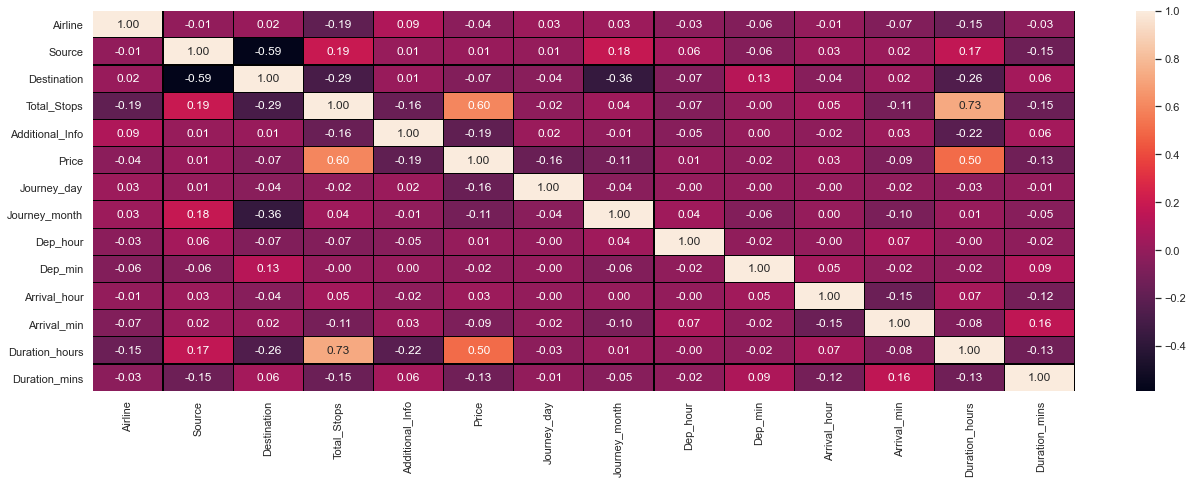

In [632]:
#Correlation using HEATMAP
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.1,linecolor="black",fmt="0.2f")

In [633]:
#Correlation with the target column
corr_mat=np.abs(df.corr())
corr_mat['Price'].sort_values(ascending=False)

Price              1.000000
Total_Stops        0.602013
Duration_hours     0.504200
Additional_Info    0.194898
Journey_day        0.159044
Duration_mins      0.131664
Journey_month      0.113396
Arrival_min        0.086163
Destination        0.065875
Airline            0.036491
Arrival_hour       0.031023
Dep_min            0.024155
Source             0.013796
Dep_hour           0.005155
Name: Price, dtype: float64

In [634]:
#Total_Stops and Duration_hours both are internally correlated as well as high correlation with the target variable.

In [635]:
#The more stops you have, more is the duration of the flight

# DIVIDE DATA INTO FEATURES & LABEL

In [636]:
#diving the columns in feature and label
X = df.drop(columns=['Price'])
X_train = df.drop(columns=['Price'])
y = df['Price']
y_train = df['Price']

# DATA VISUALIZATION

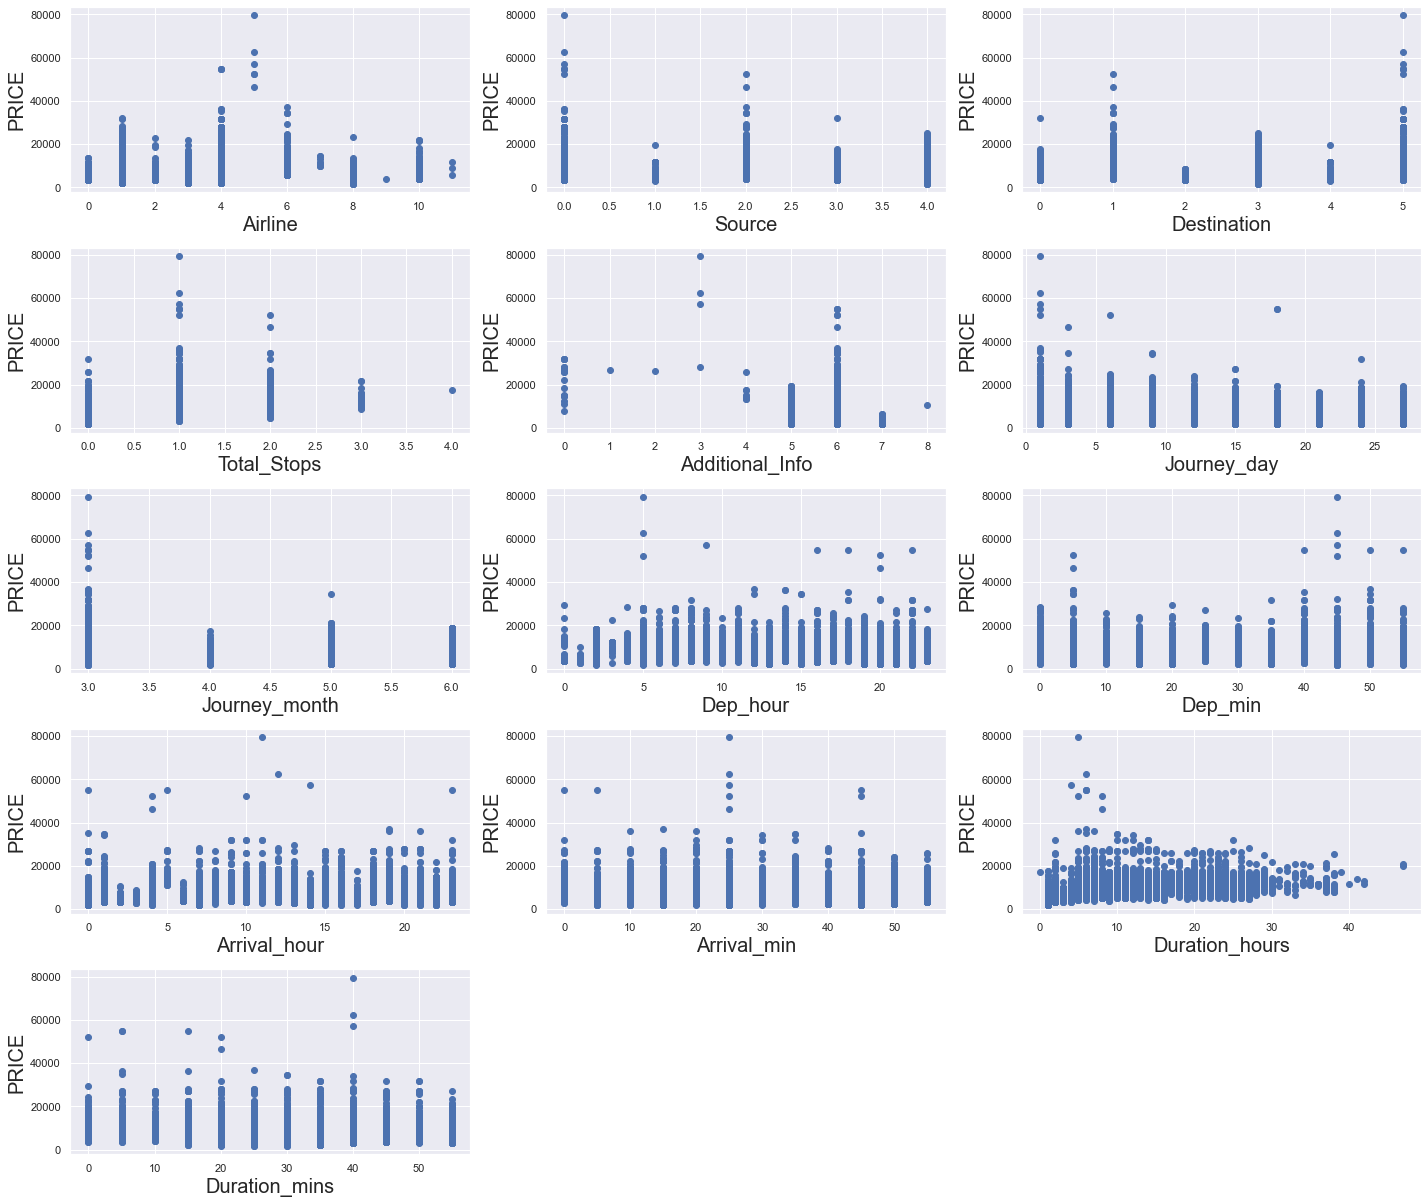

In [637]:
#Visualizing relatinship between feature and label (SCATTER PLOT)

plt.figure(figsize=(20,33),facecolor='white')
plotnumber=1

for column in X:
	if plotnumber<=30: 
		ax=plt.subplot(10,3,plotnumber)
		plt.scatter(X[column],y)
		plt.xlabel(column,fontsize=20)
		plt.ylabel('PRICE', fontsize=20)
	plotnumber+=1
plt.tight_layout()

# OBSERVATIONS :- 

1) Airline
Price for Airline 5 (Jet Airways Business) is the highest

2) Source
Source no 0 (Bangalore) has the highest price

3) Destination
Destination no 5 (New Delhi) has the highest price

4) Total_Stops
Flights having Total_Stops=1 have the highest price

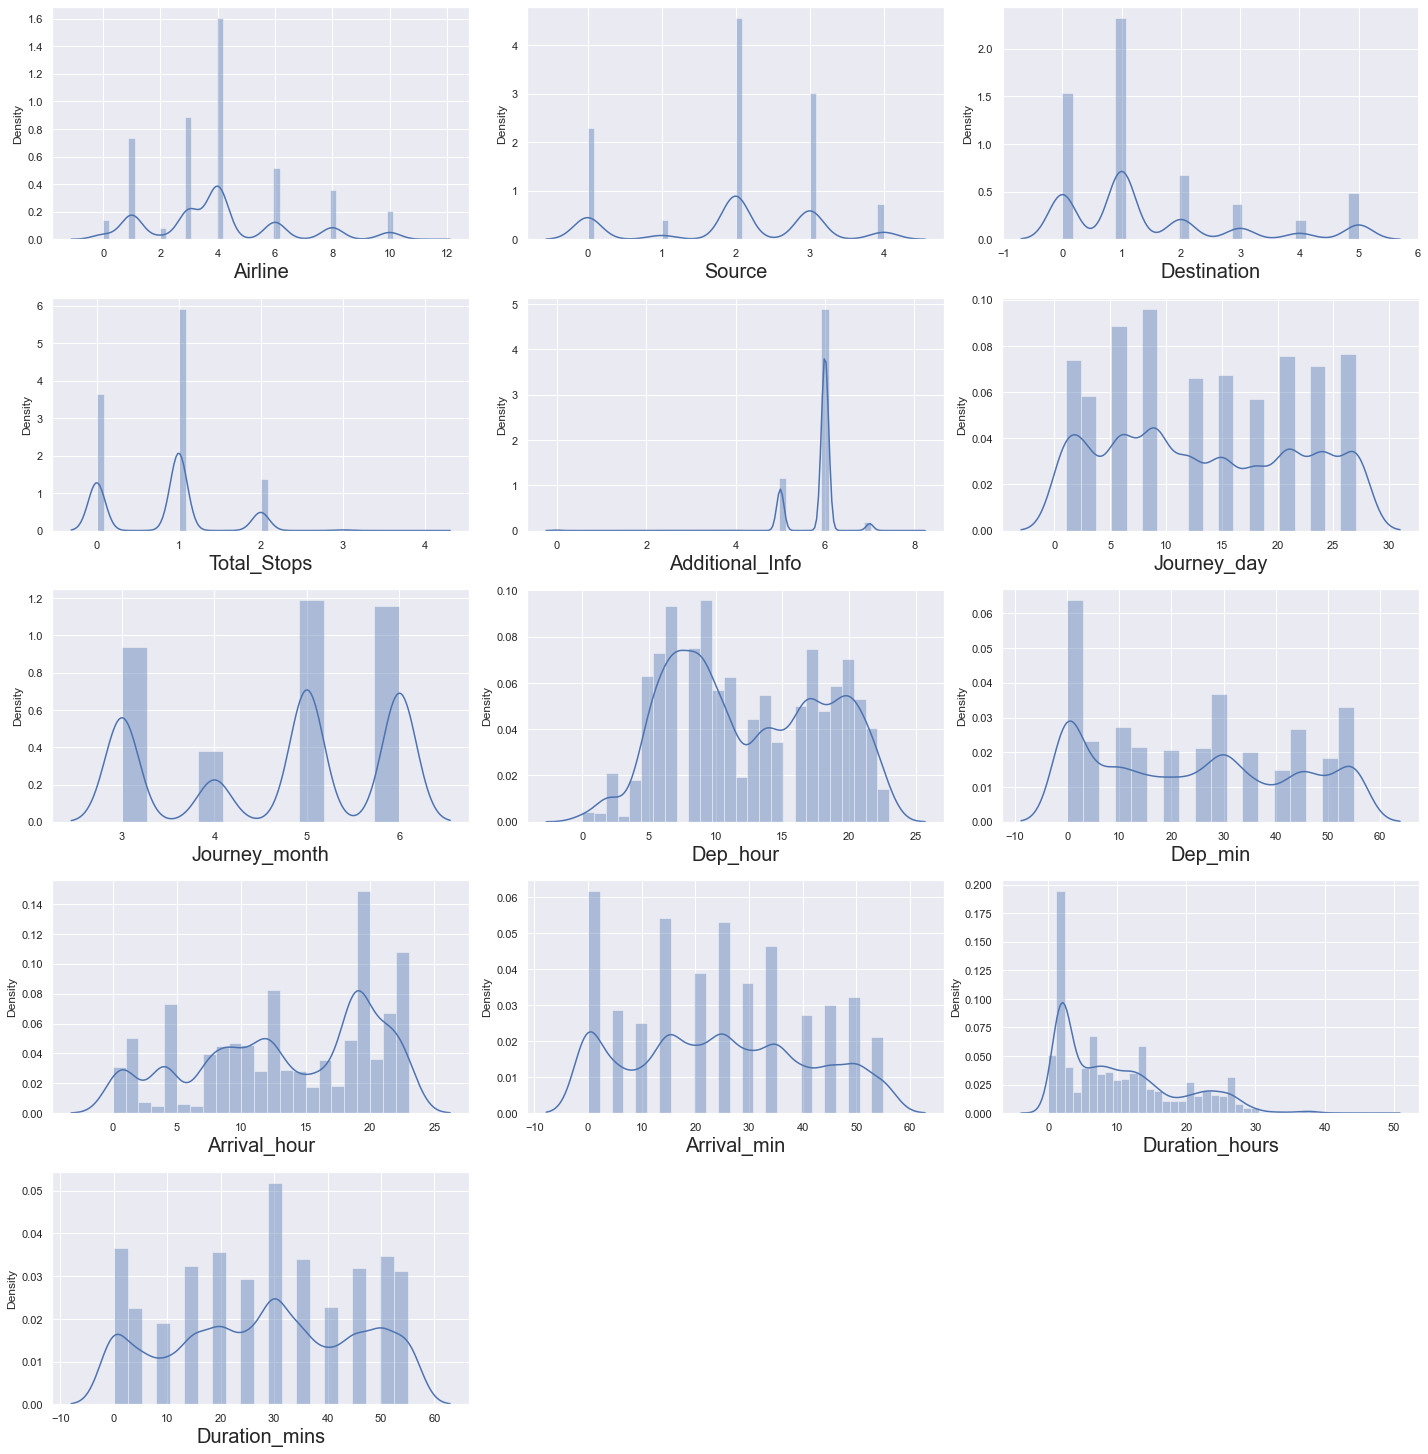

In [638]:
#Visualise the distribution of data in the feature columns(DISTRIBUTION PLOT)

plt.figure(figsize = (20,40), facecolor = 'white')
plotnumber = 1

for column in X:
    if plotnumber<=30:
        ax = plt.subplot(10,3,plotnumber)
        sns.distplot(X[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [639]:
#Since these are all categorical features, we will not check the skewness and outliers of the features.

In [640]:
#diving the columns in feature and label
X_test = df_test

In [641]:
#Data Scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.fit_transform(X_test)

In [642]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(10462, 13)
(10462,)
(2671, 13)
(2671,)


# APPLYING REGRESSION MODEL & FINDING THE BEST FIT MODEL

In [643]:
model_name=[]
r2_scores=[]
rmse_value=[]


R2Score : -527.7915266563884
MAE: 11170.99798049618
MSE: 157228136.52908581
RMSE: 12539.064420007013


Text(0, 0.5, 'Predicted Y')

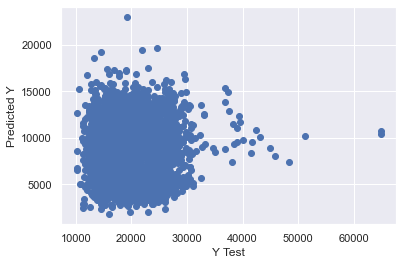

In [644]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
r2score=r2_score(y_test,y_pred)*100
print("R2Score :",r2score)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',rmse )
model_name.append('Linear Regression')
r2_scores.append(r2score)
rmse_value.append(rmse)
plt.scatter(x=y_test,y=y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

R2Score: -565.0474916559739
MAE: 11334.025708224135
MSE: 166558759.35968634
RMSE: 12905.764578655786


Text(0, 0.5, 'Predicted Y')

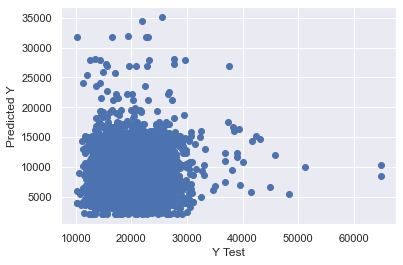

In [645]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
y_pred=dtr.predict(x_test)
r2score=r2_score(y_test,y_pred)*100
print("R2Score:", r2score)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',rmse )
model_name.append('Decision Tree Regressor')
r2_scores.append(r2score)
rmse_value.append(rmse)
plt.scatter(x=y_test,y=y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

R2Score:  -558.4424888232791
MAE: 11278.983024317627
MSE: 164904560.0864261
RMSE: 12841.517047702195


Text(0, 0.5, 'Predicted Y')

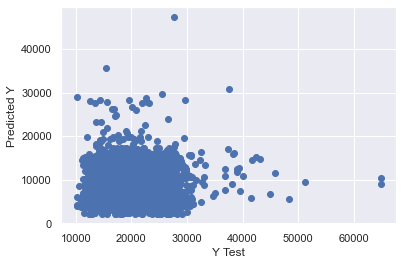

In [646]:
#RandomForest Regressor
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(x_train,y_train)
y_pred=rdr.predict(x_test)
r2score=r2_score(y_test,y_pred)*100
print("R2Score: ", r2score)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',rmse )
model_name.append('Random Forest Regressor')
r2_scores.append(r2score)
rmse_value.append(rmse)
plt.scatter(x=y_test,y=y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

R2 Score:  -568.8388410625583
MAE: 11936.633727903825
MSE: 167508289.2224145
RMSE: 12942.499342183275


Text(0, 0.5, 'Predicted Y')

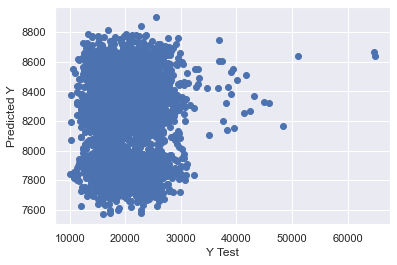

In [647]:
#SVR
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train,y_train)
y_pred = svr.predict(x_test)
r2score=r2_score(y_test,y_pred)*100
print("R2 Score: ", r2score)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',rmse )
model_name.append('SVR')
r2_scores.append(r2score)
rmse_value.append(rmse)
plt.scatter(x=y_test,y=y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

R2 Score:  -330.74197505563995
MAE: 8978.734426974836
MSE: 107877782.96970275
RMSE: 10386.423011301955


Text(0, 0.5, 'Predicted Y')

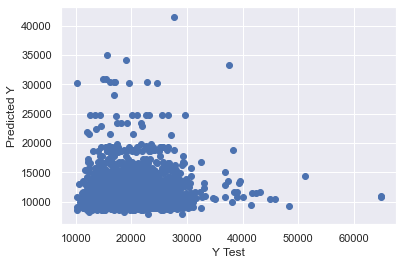

In [648]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()
ada.fit(x_train,y_train)
y_pred=ada.predict(x_test)
r2score=r2_score(y_test,y_pred)*100
print("R2 Score: ", r2score)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',rmse )
model_name.append('ADA Boost')
r2_scores.append(r2score)
rmse_value.append(rmse)
plt.scatter(x=y_test,y=y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

R2 Score:  -561.6538652254974
MAE: 11308.49407472257
MSE: 165708837.79005083
RMSE: 12872.79448255315


Text(0, 0.5, 'Predicted Y')

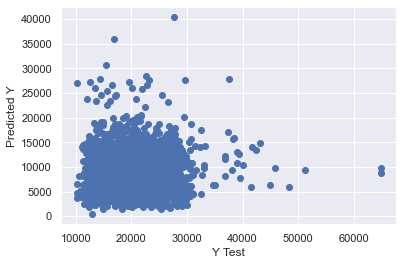

In [649]:
#XGB
import xgboost as xgb
xgb = xgb.XGBRegressor()
xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_test)
r2score=r2_score(y_test,y_pred)*100
print("R2 Score: ",r2score)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',rmse )
model_name.append('XGBoost')
r2_scores.append(r2score)
rmse_value.append(rmse)
plt.scatter(x=y_test,y=y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [650]:
import pandas as pd
Regression_Scores = pd.DataFrame()
Regression_Scores['Model Name']= model_name
Regression_Scores['r2 Score']=r2_scores
Regression_Scores['RMSE ']=rmse_value
Regression_Scores

,Model Name,r2 Score,RMSE
0,Linear Regression,-527.791527,12539.064420
1,Decision Tree Regressor,-565.047492,12905.764579
2,Random Forest Regressor,-558.442489,12841.517048
3,SVR,-568.838841,12942.499342
4,ADA Boost,-330.741975,10386.423011
5,XGBoost,-561.653865,12872.794483
